In [2]:
# USED ROLLING STATISTICS FEATURE ENGINEERING

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# DATASET
data = pd.read_csv(r'C:\Users\nh013\Desktop\inflation data set\ADO April 2023 - Inflation.csv', encoding='latin1')

# REMOVE LEADING AND TRAILING SPACE FROM COLUMN
data.columns = data.columns.str.strip()

# DROP UNEED COLUMN
columns_to_drop = ['Subregion']
data = data.drop(columns=columns_to_drop)

# MANAGE MISSING VALUE
data['Country Code'] = data['Country Code'].fillna('Unknown')

# CONVERT YEAR COLUMN TO NUMERIC FORMAT
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]

# CONVERT DATA TYPE
data['Year'] = pd.to_numeric(data['Year'])
data['Inflation'] = pd.to_numeric(data['Inflation'])

# CHECK UNIT OF MEASUREMENT IS % AVAILABLE OR NOT

if data['Unit of Measurement'].unique() != ['%']:
    print("Data consistency check failed. Unit of Measurement is not '%'.")
    
# NORMALIZE AND SCALE ALL NUMERICAL COLUMNS

scaler = MinMaxScaler()
num_cols = data.select_dtypes(include='number').columns
data[num_cols] = scaler.fit_transform(data[num_cols])

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# ROLLING STATISTICS FEATURE ENGINEERING
window_size = 3


data['Inflation_RollingMean'] = data['Inflation'].rolling(window=window_size).mean().fillna(data['Inflation'].mean())


data['Inflation_RollingStd'] = data['Inflation'].rolling(window=window_size).std().fillna(data['Inflation'].std())


data['Inflation_RollingMin'] = data['Inflation'].rolling(window=window_size).min().fillna(data['Inflation'].min())


data['Inflation_RollingMax'] = data['Inflation'].rolling(window=window_size).max().fillna(data['Inflation'].max())


data['Inflation_RollingMedian'] = data['Inflation'].rolling(window=window_size).median().fillna(data['Inflation'].median())


data['Inflation_RollingSum'] = data['Inflation'].rolling(window=window_size).sum().fillna(data['Inflation'].sum())

print(data.head(10))


                       RegionalMember      Year  Inflation  \
0                     Developing Asia -1.414214  -0.362047   
1                     Developing Asia -0.707107  -0.254212   
2                     Developing Asia  0.000000  -0.232645   
3                     Developing Asia  0.707107  -0.383614   
4                     Developing Asia  1.414214   0.004592   
7   Developing Asia excluding the PRC -1.414214  -0.232645   
8   Developing Asia excluding the PRC -0.707107  -0.189511   
9   Developing Asia excluding the PRC  0.000000  -0.060109   
10  Developing Asia excluding the PRC  0.707107  -0.038542   
11  Developing Asia excluding the PRC  1.414214   0.500633   

   Unit of Measurement Country Code  Inflation_RollingMean  \
0                    %      Unknown           2.701683e-17   
1                    %      Unknown           2.701683e-17   
2                    %      Unknown          -2.829679e-01   
3                    %      Unknown          -2.901569e-01   
4      

In [6]:
#LAG FEATURE ENGINEERING

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# DATASET
data = pd.read_csv(r'C:\Users\nh013\Desktop\inflation data set\ADO April 2023 - Inflation.csv', encoding='latin1')

# REMOVE LEADING AND TRAILING SPACE FROM COLUMN
data.columns = data.columns.str.strip()

# DROP UNEED COLUMN
columns_to_drop = ['Subregion']
data = data.drop(columns=columns_to_drop)

# MANAGE MISSING VALUE
data['Country Code'] = data['Country Code'].fillna('Unknown')

# CONVERT YEAR COLUMN TO NUMERIC FORMAT
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]

# CONVERT DATA TYPE
data['Year'] = pd.to_numeric(data['Year'])
data['Inflation'] = pd.to_numeric(data['Inflation'])

# CHECK UNIT OF MEASUREMENT IS % AVAILABLE OR NOT

if data['Unit of Measurement'].unique() != ['%']:
    print("Data consistency check failed. Unit of Measurement is not '%'.")
    
# NORMALIZE AND SCALE ALL NUMERICAL COLUMNS

scaler = MinMaxScaler()
num_cols = data.select_dtypes(include='number').columns
data[num_cols] = scaler.fit_transform(data[num_cols])

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# LAG FEATURE ENGINEERING
lag_periods = [1, 2, 3]  

for lag in lag_periods:
    data[f'Inflation_Lag{lag}'] = data['Inflation'].shift(lag)

data.dropna(inplace=True)  

print(data.head(10))


                       RegionalMember      Year  Inflation  \
3                     Developing Asia  0.707107  -0.383614   
4                     Developing Asia  1.414214   0.004592   
7   Developing Asia excluding the PRC -1.414214  -0.232645   
8   Developing Asia excluding the PRC -0.707107  -0.189511   
9   Developing Asia excluding the PRC  0.000000  -0.060109   
10  Developing Asia excluding the PRC  0.707107  -0.038542   
11  Developing Asia excluding the PRC  1.414214   0.500633   
14          Caucasus and Central Asia -1.414214   0.824139   
15          Caucasus and Central Asia -0.707107   0.651603   
16          Caucasus and Central Asia  0.000000   0.716304   

   Unit of Measurement Country Code  Inflation_Lag1  Inflation_Lag2  \
3                    %      Unknown       -0.232645       -0.254212   
4                    %      Unknown       -0.383614       -0.232645   
7                    %      Unknown        0.004592       -0.383614   
8                    %      Unkno

In [10]:
#classification model using logistic regression to predict countries at high risk for inflation in 2023

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# DATASET
data = pd.read_csv(r'C:\Users\nh013\Desktop\inflation data set\ADO April 2023 - Inflation.csv', encoding='latin1')


# REMOVE LEADING AND TRAILING SPACE FROM COLUMN

data.columns = data.columns.str.strip()

# DROP UNEED COLUMN

columns_to_drop = ['Subregion']
data = data.drop(columns=columns_to_drop)

# MANAGE MISSING VALUE

data['Country Code'] = data['Country Code'].fillna('Unknown')

# CONVERT YEAR COLUMN TO NUMERIC FORMAT
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]

# CONVERT DATA TYPE

data['Year'] = pd.to_numeric(data['Year'])
data['Inflation'] = pd.to_numeric(data['Inflation'])

# CHECK UNIT OF MEASUREMENT IS % AVAILABLE OR NOT

if data['Unit of Measurement'].unique() != ['%']:
    print("Data consistency check failed. Unit of Measurement is not '%'.")
    

threshold = 0.05  
data['HighRisk'] = (data['Inflation'] >= threshold).astype(int)


features = ['Year', 'Inflation']
target = 'HighRisk'

# DROP MISSING VALUE
data.dropna(subset=features+[target], inplace=True)

# SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# BUILD MODEL
logreg = LogisticRegression()

# FIT THE MODEL
logreg.fit(X_train, y_train)

#PREDICTION
y_pred = logreg.predict(X_test)

# EVALUATE THE MODEL PERFORMANCE
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Predicted values:", y_pred)


Accuracy: 0.9622641509433962
Predicted values: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Accuracy: 0.9622641509433962
Predicted values: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


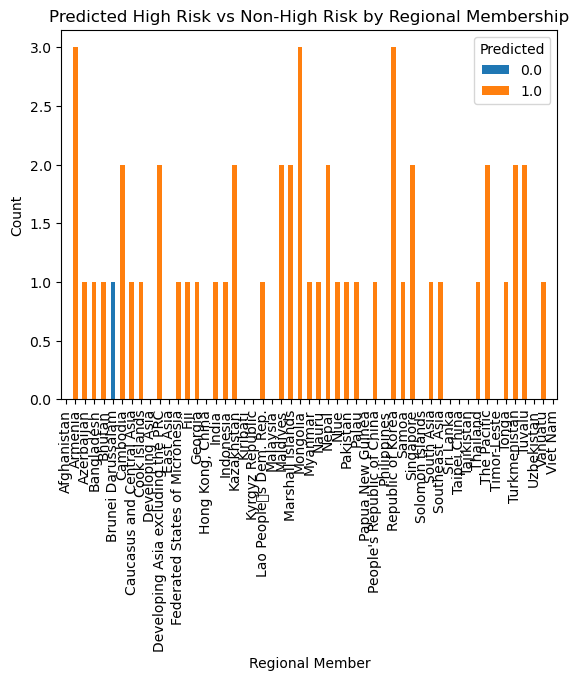

In [14]:
#VISUALIZE HIGH RISK AND NON RISK REGIONAL MEMBER

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# DATASET
data = pd.read_csv(r'C:\Users\nh013\Desktop\inflation data set\ADO April 2023 - Inflation.csv', encoding='latin1')


# REMOVE LEADING AND TRAILING SPACE FROM COLUMN
data.columns = data.columns.str.strip()

# DROP UNEED COLUMN
columns_to_drop = ['Subregion']
data = data.drop(columns=columns_to_drop)

# MANAGE MISSING VALUE
data['Country Code'] = data['Country Code'].fillna('Unknown')

# CONVERT YEAR COLUMN TO NUMERIC FORMAT
data = data[pd.to_numeric(data['Year'], errors='coerce').notnull()]

# CONVERT DATA TYPE
data['Year'] = pd.to_numeric(data['Year'])
data['Inflation'] = pd.to_numeric(data['Inflation'])

# CHECK UNIT OF MEASUREMENT IS % AVAILABLE OR NOT
if data['Unit of Measurement'].unique() != ['%']:
    print("Data consistency check failed. Unit of Measurement is not '%'.")
    

threshold = 0.05  
data['HighRisk'] = (data['Inflation'] >= threshold).astype(int)


features = ['Year', 'Inflation']
target = 'HighRisk'

# DROP MISSING VALUE
data.dropna(subset=features+[target], inplace=True)

# SPLIT DATA 
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# BUILD MODEL
logreg = LogisticRegression()

# FIT THE MODEL
logreg.fit(X_train, y_train)

# PRDICTION 
y_pred = logreg.predict(X_test)

# EVALUATE THE MODEL
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Predicted values:", y_pred)


data['RegionalMember'] = data['RegionalMember'].astype('category')


data['Predicted'] = float('nan')

data.loc[X_test.index, 'Predicted'] = y_pred


grouped_data = data.groupby(['RegionalMember', 'Predicted']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Regional Member')
plt.ylabel('Count')
plt.title('Predicted High Risk vs Non-High Risk by Regional Membership')


plt.show()
